In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import os
cwd = os.getcwd()
os.chdir('../src/')
import ep_utils as epu
os.chdir(cwd)

import time


In [181]:
master_list = []

# for n in [50*2**i for i in range(1,5)]:
iteration = 0
for avg_conns in [1+.5*i for i in range(0,15)]:
    print(f"running avg_conns: {avg_conns}", end='\r')
    for _ in range(20):
        # G = nx.random_geometric_graph(400, geo_radius, seed=iteration)
        graph_size = 400
        G = nx.gnp_random_graph(graph_size, avg_conns / graph_size, seed=iteration)

        # running algorithm
        start_time = time.perf_counter()
        lepard_eigvals = epu.getEigenvaluesNx(G)
        end_time = time.perf_counter()
        lepard_time = end_time - start_time

        start_time = time.perf_counter()
        nx_eigvals = nx.adjacency_spectrum(G)
        end_time = time.perf_counter()
        nx_time = end_time - start_time

        rel_runtime = lepard_time / nx_time

        # get first iteration of CEP finder
        conns = np.sum(nx.adjacency_matrix(G).todense(), axis=1).A1
        conns_std, conns_mean, conns_nrm = np.std(conns), np.mean(conns), len(np.unique(conns)) / G.number_of_nodes()  

        # average node degree
        deg = G.number_of_edges() / G.number_of_nodes()
        # node density
        dens = nx.density(G)
        # assortativity
        assrt = nx.degree_assortativity_coefficient(G)
        # transitivity
        trns = nx.transitivity(G)

        # diameter, average path length
        d = 0 #nx.diameter(G)
        apl = 0 #nx.average_shortest_path_length(G)
        r = 0 #nx.radius(G)

        master_list.append([iteration, avg_conns, rel_runtime, conns_std, conns_mean, conns_nrm, deg, dens, assrt, trns])#, d, apl, r])
        iteration += 1

columns = ['iteration', 'avg_conns', 'rel_runtime', 'conns_std', 'conns_mean', 'conns_nrm', 'deg', 'dens', 'assrt', 'trns']#,'d','apl','r']
df = pd.DataFrame(data=master_list, columns=columns)


In [183]:
df

,iteration,avg_conns,rel_runtime,conns_std,conns_mean,conns_nrm,deg,dens,assrt,trns
0,0,1.0,0.254051,0.926607,0.920,0.0125,0.4600,0.002306,-0.102955,0.000000
1,1,1.0,0.229575,1.021164,1.085,0.0150,0.5425,0.002719,-0.040572,0.000000
2,2,1.0,0.277407,0.967678,0.940,0.0150,0.4700,0.002356,-0.059078,0.000000
3,3,1.0,0.500436,1.102713,1.155,0.0150,0.5775,0.002895,0.016978,0.000000
4,4,1.0,0.287966,1.022240,0.995,0.0150,0.4975,0.002494,0.068793,0.000000
...,...,...,...,...,...,...,...,...,...,...
295,295,8.0,1.051400,2.710530,7.945,0.0375,3.9725,0.019912,0.014780,0.011995
296,296,8.0,1.044254,2.783146,7.710,0.0425,3.8550,0.019323,0.012660,0.022697
297,297,8.0,1.060442,2.745355,7.945,0.0425,3.9725,0.019912,0.007960,0.020808
298,298,8.0,1.024336,2.682816,8.150,0.0425,4.0750,0.020426,-0.001023,0.018558


In [182]:
df.corr()['rel_runtime']

iteration      0.418464
avg_conns      0.417179
rel_runtime    1.000000
conns_std      0.481947
conns_mean     0.420325
conns_nrm      0.470468
deg            0.420325
dens           0.420325
assrt          0.086174
trns           0.367773
Name: rel_runtime, dtype: float64

In [59]:
df.iloc[:,:5]

,iteration,random_geo_radius,alg_time,conns_std,conns_mean
0,0,0.104848,0.007945,3.799421,10.38
1,0,0.199192,0.009834,4.994157,19.72
2,0,0.334343,0.011494,8.117266,33.10
3,0,0.458788,0.021296,13.550041,45.42
4,0,0.660000,0.015879,16.039464,65.34
...,...,...,...,...,...
395,49,0.455354,0.013573,12.702504,45.08
396,49,0.693535,0.014426,15.737992,68.66
397,49,0.725253,0.014090,15.385708,71.80
398,49,0.854545,0.013302,11.955752,84.60


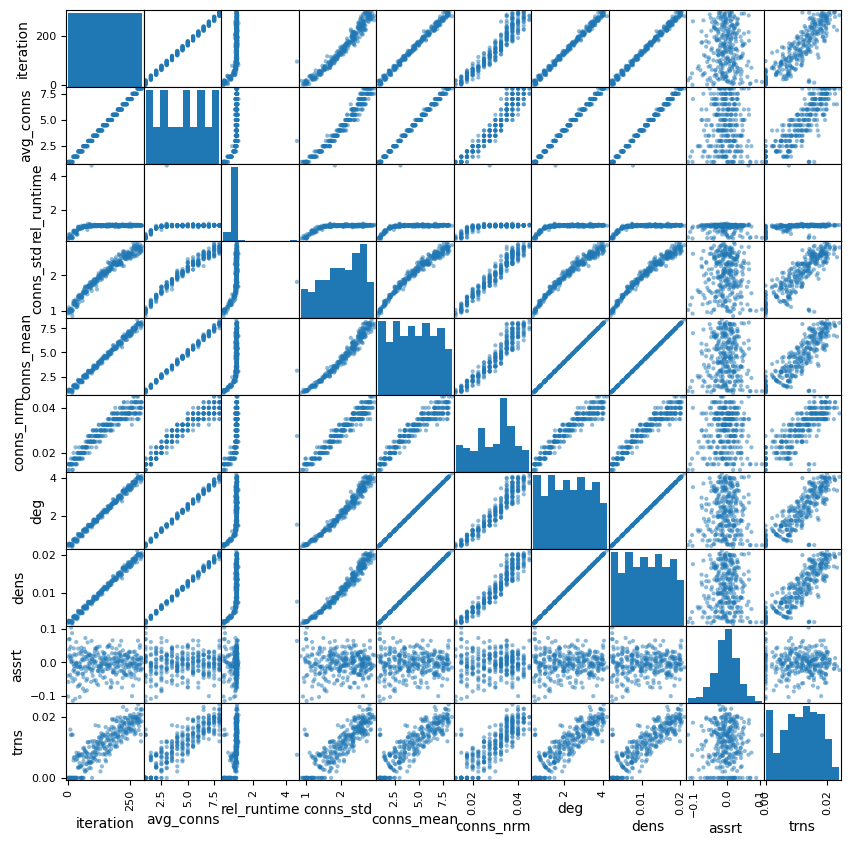

In [184]:
pd.plotting.scatter_matrix(df, figsize=(10,10));